In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re as r
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
import joblib as j




#  **Data Overview and Preprocessing** 🛠



###  **Data Cleaning**


###  **Data Visualization**



###  **Data Information**



### **Handling Missing Values**


By performing these steps, you have cleaned and preprocessed your data, ensuring that it is ready for further analysis and modeling. The visualization helps to understand the distribution of different mental health statuses in the dataset. 📈📉


In [3]:
df=pd.read_csv("Combined Data.csv")

In [5]:
df.head(3)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


In [7]:
df.tail(3)

,Unnamed: 0,statement,status
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [9]:
df.sample(5)

,Unnamed: 0,statement,status
20875,20875,I fake it. I get up. Do work. Workout. Cook. S...,Depression
30962,30962,i don't have even one dollar in it.,Normal
47219,47219,I failed I'm going to kill myself soon I just ...,Depression
14672,14672,"if i take a bunch of hydroxyzine, seroquel, an...",Suicidal
22183,22183,..but all I can think of is how should I kill ...,Depression


In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.sample(3)

,statement,status
9900,At that point where I have absolutely exhauste...,Suicidal
24711,I am so fucking depressed. I have nobody to ta...,Depression
5427,"This Signal drama has a bad ending, hang it up",Normal


In [15]:
df['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [17]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [19]:
df['status'].nunique()

7

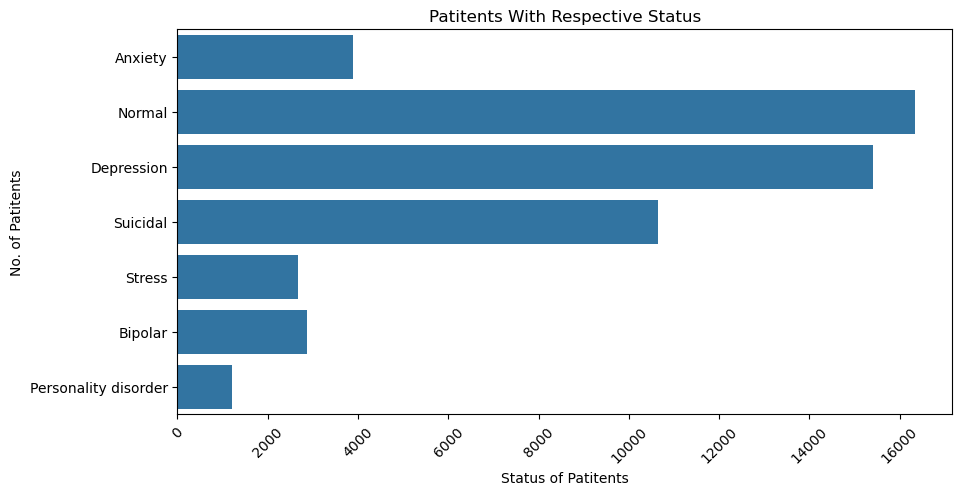

In [21]:
mp.figure(figsize=(10,5))
sn.countplot(df['status'])
mp.xlabel("Status of Patitents")
mp.ylabel("No. of Patitents")
mp.title("Patitents With Respective Status")
mp.xticks(rotation=45)
mp.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 53043 entries, 0 to 53042

Data columns (total 2 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   statement  52681 non-null  object

 1   status     53043 non-null  object

dtypes: object(2)

memory usage: 828.9+ KB


In [113]:
df.isna().sum()

statement    362
status         0
dtype: int64

In [114]:
df.shape

(53043, 2)

In [115]:
df.dropna(inplace=True)

In [116]:
df.shape

(52681, 2)

#  **Resampling and Preprocessing** 


###  **Handling Missing Values and Duplicates**


###  **Text Preprocessing**


By performing these steps, you have resampled your data to balance the categories, handled missing values and duplicates, and preprocessed the text data to make it suitable for further analysis and modeling. 📈📉


In [117]:
max_count=df['status'].value_counts().max()
max_count

16343

In [118]:
def resmpl(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()
    
    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class, 
                                          replace=True,    
                                          n_samples=max_count,    
                                          random_state=42)   
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])
    
    return df_resampled


df = resmpl(df)



In [119]:
df.sample(5)

,statement,status
19290,"The voices never stop mocking me, telling me t...",Suicidal
17027,"When I was barely over the age of one, cps too...",Depression
49846,Bipolar x Anxiety x ADHD I was diagnosed as bi...,Bipolar
44519,not going swimming,Normal
35200,Afraid of Tetanus On my way to the bathroom I ...,Anxiety


In [120]:
df.status.value_counts()

status
Anxiety                 16343
Normal                  16343
Depression              16343
Suicidal                16343
Stress                  16343
Bipolar                 16343
Personality disorder    16343
Name: count, dtype: int64

In [121]:
df.shape

(114401, 2)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 114401 entries, 52349 to 51085

Data columns (total 2 columns):

 #   Column     Non-Null Count   Dtype 

---  ------     --------------   ----- 

 0   statement  114401 non-null  object

 1   status     114401 non-null  object

dtypes: object(2)

memory usage: 2.6+ MB


In [123]:
df.isna().sum()

statement    0
status       0
dtype: int64

In [124]:
df.duplicated().sum()

70887

In [125]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))


    return " ".join(l)  


In [126]:
df['statement']=df['statement'].apply(preprocessing)

#  **Data Splitting and Vectorization**

###  **Data Splitting**



###  **Text Vectorization**


By performing these steps, you have successfully split your data into training and testing sets and vectorized the text data using TF-IDF, preparing it for further modeling and analysis. 📈📉


In [132]:
x=df['statement']
y=df['status']

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [134]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(91520,) (91520,) (22881,) (22881,)


In [135]:
vec=TfidfVectorizer()
x_train_tfidf=vec.fit_transform(x_train)
x_test_tfidf=vec.transform(x_test)

In [136]:
print(x_train_tfidf.shape,x_test_tfidf.shape)

(91520, 50369) (22881, 50369)


In [139]:
print(x_train_tfidf)

  (0, 30248)	0.0313767140008035

  (0, 6668)	0.08298004570044384

  (0, 17773)	0.06300548106185892

  (0, 9015)	0.08235784267605498

  (0, 2960)	0.1280124900317293

  (0, 20319)	0.48623373617165633

  (0, 41773)	0.05973315211674453

  (0, 11700)	0.10348982931920427

  (0, 23941)	0.06116736528569411

  (0, 22266)	0.08093684916685749

  (0, 44973)	0.05421310855664678

  (0, 39090)	0.31835118080699304

  (0, 47063)	0.20245068493317422

  (0, 31478)	0.03875929163887042

  (0, 43897)	0.08829108046758513

  (0, 35462)	0.16158185480571943

  (0, 4474)	0.07272642414230632

  (0, 47847)	0.04462935564083871

  (0, 45532)	0.1274543879522332

  (0, 4019)	0.1128629957551296

  (0, 8434)	0.09130452056664384

  (0, 5806)	0.06279665878623762

  (0, 49927)	0.10472727742727524

  (0, 40805)	0.038667167585213345

  (0, 8376)	0.08147502637448678

  :	:

  (91518, 48935)	0.10120989195968523

  (91518, 30534)	0.11373771200577895

  (91518, 10022)	0.09533057365326578

  (91518, 40291)	0.11780623873454635

  

In [140]:
print(x_test_tfidf)

  (0, 2398)	0.05035397878771241

  (0, 3703)	0.07320941464219106

  (0, 3719)	0.04945296482499577

  (0, 4019)	0.15675718277921616

  (0, 4810)	0.11737331080358715

  (0, 5303)	0.052186729330794

  (0, 6318)	0.05436363165306049

  (0, 6433)	0.18227044768251002

  (0, 6711)	0.0763177358230594

  (0, 8193)	0.07803303207130406

  (0, 8376)	0.09052955233644083

  (0, 10522)	0.14838404280870615

  (0, 10586)	0.11499091607015448

  (0, 13650)	0.1168555321853951

  (0, 14337)	0.10936338778202384

  (0, 14338)	0.17407044774068042

  (0, 14401)	0.12870101695385922

  (0, 15591)	0.05769563926436251

  (0, 16111)	0.17407044774068042

  (0, 18581)	0.048880644608280614

  (0, 20098)	0.08149748857951512

  (0, 20242)	0.03790686761385113

  (0, 21588)	0.05636337471584874

  (0, 22595)	0.10865274303244052

  (0, 22773)	0.09702690249120034

  :	:

  (22880, 6668)	0.15062105504545975

  (22880, 6711)	0.12467277606058141

  (22880, 7381)	0.20725901340832076

  (22880, 7393)	0.3932160072953328

  (22880, 

#  **Model Training and Evaluation** 

###  **Random Forest Classifier**


###  **AdaBoost Classifier** 

###  **Extra Trees Classifier** 

###  **Logistic Regression** 



By performing these steps, you have successfully trained multiple classifiers, evaluated their performance using accuracy and precision metrics, and saved the best-performing model and the vectorizer for future use. 📈📉


In [143]:
rf=RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [151]:
ypred=rf.predict(x_test_tfidf)
ytr_pred=rf.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))


Test accuracy:  0.9538481709715484

Train accuracy:  0.9997705419580419

Precision Test accuracy:  0.9535989640791941

Precision Train accuracy:  0.999770714848328


In [152]:
adb=AdaBoostClassifier()
adb.fit(x_train_tfidf,y_train)

c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

  warnings.warn(


AdaBoostClassifier()

In [153]:
ypred=adb.predict(x_test_tfidf)
ytr_pred=adb.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.6598050784493684

Train accuracy:  0.6638658216783216

Precision Test accuracy:  0.6665924232283339

Precision Train accuracy:  0.6700542768027757


In [154]:
ext=ExtraTreesClassifier()
ext.fit(x_train_tfidf,y_train)

ExtraTreesClassifier()

In [155]:
ypred=ext.predict(x_test_tfidf)
ytr_pred=ext.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.952580743848608

Train accuracy:  0.9997705419580419

Precision Test accuracy:  0.9526895518600184

Precision Train accuracy:  0.999770714848328


In [156]:
lr=LogisticRegression()
lr.fit(x_train_tfidf,y_train)

c:\Users\Anurag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
ypred=lr.predict(x_test_tfidf)
ytr_pred=lr.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,ypred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))

Test accuracy:  0.8749617586643941

Train accuracy:  0.9048841783216783

Precision Test accuracy:  0.8725104565039661

Precision Train accuracy:  0.9036423537408258


In [159]:
j.dump(vec,'vecctorizer.pkl')
j.dump(rf,'model.pkl')

['model.pkl']

#  **Model Inference** 


By performing these steps, the model can accurately predict the mental health status based on the provided text input. The preprocessing ensures that the text is in a suitable format for the model to analyze and make predictions. 


In [160]:
vector=j.load('vecctorizer.pkl')
model=j.load('model.pkl')

In [161]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=r.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))

        


    return " ".join(l) 

In [162]:
text="trouble sleeping, confused mind, restless heart. All out of tune"

In [163]:
text=preprocessing(text)

In [164]:
def predi(x):
    vec=vector.transform([text])
    result=model.predict(vec)[0]

    return result

In [165]:
predi(text)

'Anxiety'

In [168]:
text='It shows I have posted but I cannot find my post back here Am I not allowed to post here?'

In [169]:
text=preprocessing(text)

In [170]:
predi(text)

'Suicidal'

#  **Conclusion** 
- The model demonstrates strong performance in predicting mental health statuses such as `Anxiety`, `Normal`, `Depression`, `Suicidal`, `Stress`, `Bipolar`, and `Personality Disorder`. 
- This analysis shows the importance of data preprocessing and feature extraction using TF-IDF vectorization in achieving accurate results.
- The high accuracy and precision scores of the model suggest that it can be a valuable tool in identifying mental health issues based on text input.

